In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time = np.loadtxt('20171003_ch2_interference_w_sas_nodop_leftmost.isf', delimiter=',')[:,0]
ch2 = np.loadtxt('20171003_ch2_interference_w_sas_nodop_leftmost.isf', delimiter=',')[:,1]
ch3 = np.loadtxt('20171003_ch2_interference_w_sas_nodop_leftmost.isf', delimiter=',')[:,1]

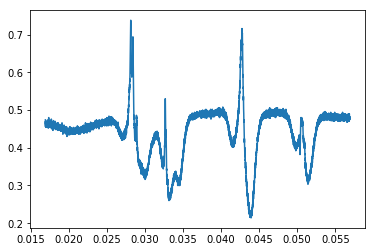

In [12]:
plt.plot(time, ch2)

In [21]:
##Defining function to pull desired information from the data
def get_peak_data(array, plotrange):
    peak = []
    maximum = 0
    maximum_loc = 0
    max_ind = 0
    inds = []
    for i in range(len(time)):
        if (time[i] >= plotrange[0]) and (time[i] <= plotrange[1]):
            peak.append(array[i])
            inds.append(i)
            if array[i] >= maximum:
                maximum = array[i]
                maximum_loc = time[i]
                max_ind = i
    print("Maximum found at: t = {}".format(maximum_loc))
    print("Maximum value occurs at index: {}".format(max_ind))
    print("Maximum value: {}".format(np.max(peak)))
    plt.plot([time[j] for j in inds], peak)
    plt.plot(maximum_loc, maximum, 'rp')
    return peak

In [39]:
##Defining function to pull desired information from the data
def show_local_peaks(array, plotrange):
    peak = []
    inds = []
    for i in range(len(time)):
        if (time[i] >= plotrange[0]) and (time[i] <= plotrange[1]):
            peak.append(array[i])
            inds.append(i)
    plt.plot([time[j] for j in inds], peak)

Extracting the information for local peaks separations.

Maximum found at: t = 0.028124
Maximum value occurs at index: 2803
Maximum value: 0.738


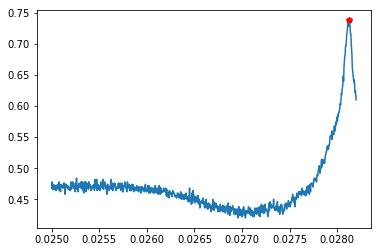

In [28]:
get_peak_data(ch2, [0.025, 0.0282]);

Maximum found at: t = 0.028412
Maximum value occurs at index: 2875
Maximum value: 0.694


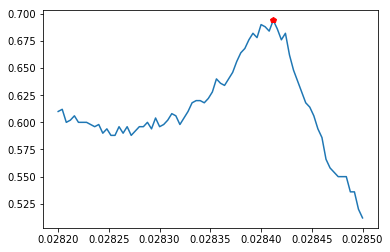

In [30]:
get_peak_data(ch2, [0.0282, 0.0285]);

Maximum found at: t = 0.028876
Maximum value occurs at index: 2991
Maximum value: 0.486


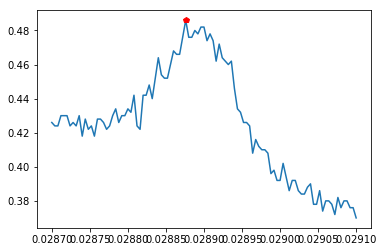

In [34]:
get_peak_data(ch2, [0.0287, 0.0291]);

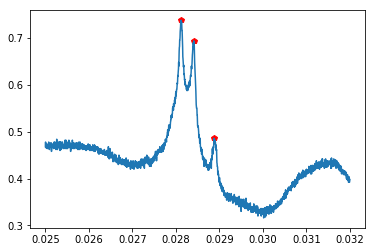

In [44]:
local_maximums_voltages = [0.738, 0.694, 0.486]
local_maximums_times = [0.028124, 0.028412, 0.028876]
plt.plot(local_maximums_times, local_maximums_voltages, 'rp')
show_local_peaks(ch2, [0.025, 0.032])

In [45]:
differences = [0]
for i in range(1,len(local_maximums_times)):
    differences.append(local_maximums_times[i]-local_maximums_times[i-1])

from prettytable import PrettyTable
x = PrettyTable()
x.add_column("Time (s)", local_maximums_times)
x.add_column("Voltage (V)", local_maximums_voltages)
x.add_column("Difference (s)", [round(i, 5) for i in differences])
x.add_column("Number of Interferometer Distances Apart", [round(i, 5)/0.00158 for i in differences])
x.add_column("Separation of Features (MHz)", [round(i, 5)/0.00158 *379 for i in differences])
print(x)

+----------+-------------+----------------+------------------------------------------+------------------------------+
| Time (s) | Voltage (V) | Difference (s) | Number of Interferometer Distances Apart | Separation of Features (MHz) |
+----------+-------------+----------------+------------------------------------------+------------------------------+
| 0.028124 |    0.738    |       0        |                   0.0                    |             0.0              |
| 0.028412 |    0.694    |    0.00029     |           0.18354430379746836            |       69.5632911392405       |
| 0.028876 |    0.486    |    0.00046     |            0.2911392405063291            |      110.34177215189874      |
+----------+-------------+----------------+------------------------------------------+------------------------------+
